In [1]:
%run "../../shared/utilz_image_proc.ipynb"

# Animated Text and GIFs
**Turtle:**
- For animations but not what i need here << Is a drawing board
- Fun way to intro programming to kids!!<< part of original 1966 Logo programming language 
- Runs on `tkinter` so get [`ipyturtle`](https://github.com/gkvoelkl/ipython-turtle-widget) to output here 
    - Must output the turtle object in target cell before draw on it

**Pillow:**
- 

In [2]:
## use sys = per xter, os = clear screen, time = wait delay
import sys, time, os
def animated_text_output_typewriter(msg):
    for char in msg:
        sys.stdout.write( char )
        sys.stdout.flush()
        if char != '\n':
            time.sleep( 0.1 )
        else:
            time.sleep( 1 )
#os.system("cls") #clear screen to show next line

In [3]:
animated_text_output_typewriter('The quick brown fox jumped \nover the lazy dogs')

The quick brown fox jumped 
over the lazy dogs

## 1. Turtle Play

In [4]:
### --- Turtle Fun
import turtle ## this is on tkinter
from ipyturtle import Turtle

def run_on_turtle( drawer_func=None):
    win = turtle.Turtle()
    if drawer_func:
        drawer_func(win)
    turtle.done()

In [5]:
## basics
def basics_drawer(win, gl=50):
    win.forward( gl )
    win.left( 45 )
    
    make_square( win)   
    
    win.forward( gl )
    win.left( 45 )   
    
    make_isotriangle(win)
    
    win.penup()
    win.forward( gl*3 )
    win.left( 45 )
    win.pendown()
    make_circle(win)
    
    ##set heading
#     win.setheading(60)
#     make_square( win )
#     make_isotriangle(win)
    
def make_square(win, w=30, c='red', bc='orange', fill=True): # or use hex values '#ff0000'
#     win.color( c , bc) ## border color, fill color
#     if fill:
#         win.begin_fill()
    for _ in range(4):
        win.forward(w)
        win.left(90)
    
#     if fill:
#         win.end_fill()

def make_isotriangle(win, w=30):
    for _ in range(3):
        win.forward(w)
        win.left( 120 )
        
def make_circle(win, w=100, h=10):
    for _ in range(360):
        win.forward(1)
        win.left(1)
    

In [6]:
# run_on_turtle( basics_drawer)

In [7]:
win = Turtle(fixed=False, width=400, height=300)
win

Turtle()

In [8]:
basics_drawer(win)

In [9]:
win = Turtle(fixed=False, width=500, height=400)
win

Turtle()

In [10]:
def draw_stary_flower(win, w=200, a=170): ## use sharp angles else starts to build octagons++
    for _ in range(200):
        win.forward( w )
        win.right(a)


In [28]:
for i in range(3):    
    draw_stary_flower( win )
    win.penup()
    win.right( 45*i )
    win.forward( 150 )
    win.pendown()


In [12]:
## play with math functions
import math

In [20]:
win = Turtle(fixed=False, width=500, height=400)
win

Turtle()

In [21]:
def draw_flower2(win, w=10, a=90, c='orange'):
    win.pencolor(c)
    for i in range(1000):
        win.forward( math.sqrt(i)*w ) 
        win.left( i%a )

In [23]:
draw_flower2(win, w=1, a=180)

In [24]:
win = Turtle(fixed=False, width=500, height=400)
win

Turtle()

In [25]:
## color fill the window background == screen.bgcolor()
win.position()
# reset
win.reset()

(0.0, 0.0)

In [26]:
def draw_star(win, w=20, a=216):
#     n = 360 // a
    for i in range(5):
        win.forward( w )
        win.left( a )
        win.forward( w )

    
def fractal_one(win, w=80, a=135, c='red'):
    win.pencolor(c)                
    for _ in range( 10 ):
        draw_star(win, 20, 216 )
        win.penup()
        win.forward(w)
        win.right( a )
        win.pendown()
        
def fractal_two(win, w=200, a = 216, c = 'blue'):
    win.pencolor(c)       
    if w <= 10:
        return
    else:
        for i in range(5):
            win.forward( w )
            fractal_two(win, w/4 )
            win.left( a )

In [27]:
win.reset()
fractal_one(win)
win.forward( 40 )
fractal_two(win )

# 2. PIL Pillow Vs OpenCV2

In [46]:
from PIL import Image, ImageDraw

### Text Quotes

In [104]:
def pil_create_image_quote(msg, w=200, h=100, c=(143,3,138) ): 
    img = Image.new('RGB', (w,h), color=c)
    out = ImageDraw.Draw( img ) ## setup canvas
    out.text( (10,40) , msg, fill=(250,250,250) ) ## write text at position 100,100
    return np.array(img)

def cv2_create_image_quote(msg, w=200, h=100, c=(143,3,138) ): 
    canvas = np.zeros( (h,w, 3) )
#     canvas[:,:,] = np.array(c) #set bgcolor
    _ = cv2.putText(canvas, msg, 
                   (10,40),
                   cv2.FONT_HERSHEY_SCRIPT_COMPLEX|cv2.FONT_ITALIC,
                   1,
                   (250,250,250),
                   1)
    return canvas

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


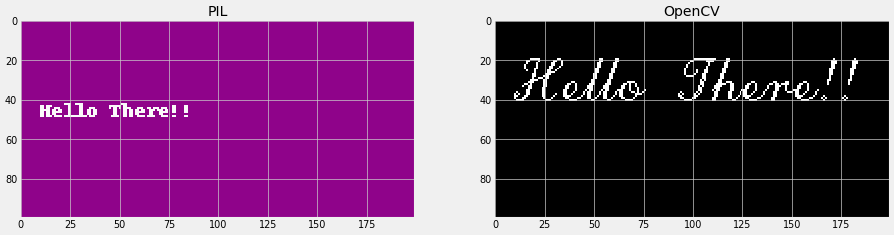

In [105]:
grid_plot_images(
    [ pil_create_image_quote('Hello There!!'), 
      cv2_create_image_quote('Hello There!!') ],
    [ 'PIL', 'OpenCV'],
    logit=False)

### Image GIFS

- `imageio::writer` << Resulting gif is not yet optimized, though, and so can result in large/heavy files

- `pygifsicle` to compress.
    - 

In [141]:
imgz = [
    "https://images-na.ssl-images-amazon.com/images/I/61dePwCxFYL._AC_SX522_.jpg",
    "https://i.ebayimg.com/images/g/VvsAAOSwtEBbczpV/s-l400.jpg",
    "https://i.frog.ink/p2MHnV3c/hbmagnet1143_600.jpg?v=1534254480.777"
]

dict_imagez = fetch_imagez_dict( imgz )

def fix_base(img, c=100):
    w = img.shape[0]
    h = img.shape[1]
    return img[ 0:w-c, 0:h, :] if len(img.shape) ==3 else img[ 0:w-c, 0:h]


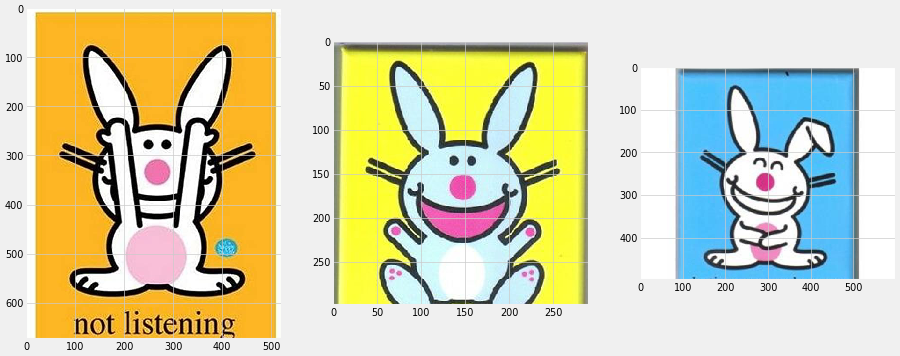

In [107]:
grid_plot_images( [fix_base(x[0]) for x in dict_imagez.values()], nc=3, logit=False)

In [127]:
import imageio ## gif reader writer includes
from pygifsicle import optimize as gif_optimizer ##compress 
from IPython import display

In [147]:
def create_gif(imagez, fps=30, outp='tester', outf='gif'):
    outfpath = f'{outp}.{outf}'
    
    with imageio.get_writer( outfpath , fps=0.01, mode='I') as writer:
        writer.append_data( np.zeros( (400, 600, 3)) ) ## setup canvas 
        for img in imagez:
            writer.append_data( img )
            
    print( f'compressing {outfpath}')
#     gif_optimizer( outfpath )
        
    return outfpath

In [148]:
gif_imagez = [ pil_create_image_quote('Opening Remarks') ]
for d in dict_imagez.values():
    gif_imagez.append( fix_base(d[0] ) )
    gif_imagez.append( fix_base(d[1] ) )
    
gif_imagez.append( cv2_create_image_quote('Finito!!') )

gifpath = create_gif( gif_imagez)

display.Image( url=gifpath )

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 250.0]. Convert image to uint8 prior to saving to suppress this warning.


compressing tester.gif
